In [13]:
import numpy as np

Linear Regression

In [14]:
class Linear_Regression:
  # initiating the parameters
  def __init__(self, learning_rate, no_of_iterations):

    self.learning_rate = learning_rate
    self.no_of_iterations = no_of_iterations

  def fit(self, X, Y):

    # number of training examples and number of features

    self.m, self.n = X.shape # number of rows and columns

    # initiating the weights and bias

    self.w = np.zeros(self.n)

    self.b = 0

    self.X = X
    self.Y = Y

    # implementing gradient descent

    for i in range(self.no_of_iterations):
      self.update_weights()

  def update_weights(self,):

    Y_prediction = self.predict(self.X)

    # calculating gradient descent

    dw = - (2 * (self.X.T).dot(self.Y - Y_prediction))/ self.m

    db = - 2 * np.sum(self.Y - Y_prediction)/ self.m

    #updating the weights

    self.w = self.w - self.learning_rate*dw
    self.b = self.b - self.learning_rate*db


  def predict(self, X):

    return X.dot(self.w) + self.b


Using Linear Regression model for prediction:

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

Data Pre-processing:

In [16]:
salary_data = pd.read_csv("/content/salary_data.csv")

In [17]:
salary_data.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [18]:
salary_data.shape

(30, 2)

Splitting features and target:

In [19]:
X = salary_data.iloc[:,:-1].values
Y = salary_data.iloc[:,1].values

Splitting data into training andtesting data:

In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33, random_state = 2)

Training Linear Regression model:

In [21]:
model = Linear_Regression(learning_rate = 0.02, no_of_iterations = 1000)

In [22]:
model.fit(X_train, Y_train)

In [25]:
# printing parameter values
model.w[0], model.b


(9514.400999035135, 23697.406507136307)

Predicting Salary ofr test data:

In [26]:
test_data_prediction = model.predict(X_test)

In [27]:
test_data_prediction

array([ 36066.12780588,  34163.24760607,  66512.21100279,  58900.69020357,
        91249.65360029,  80783.81250135, 101715.49469922,  52240.60950424,
        42726.20850521,  88395.33330058])

In [31]:
sum = 0
diff = (test_data_prediction - Y_test)
for i in diff:
  sum = sum + i*i
print(sum/len(diff))

60483757.90524937


Visualizing the predicted values and actual values:

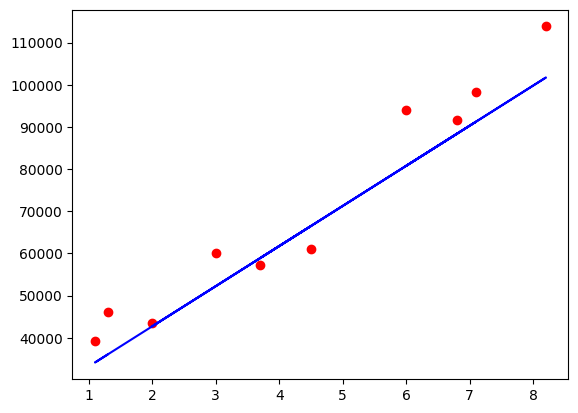

In [33]:
plt.scatter(X_test, Y_test, color = 'red')
plt.plot(X_test, test_data_prediction, color = 'blue')
plt.show()